# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


1-.

In [3]:
c = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
df_vn = df[c].copy()#Dataframe con los datos con las variables numericas.


for cols in df_vn.columns:#Iteramos sobre las columnas y asociamos el promedio a los valores nan con "isnull()".
    mean = df_vn[cols].mean()
    df_vn.loc[df_vn[cols].isnull(),cols] = mean 

df_vn

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984.0,2.5,4.0,522.764706,0.222671
1,1984.0,4.2,6.0,683.615385,0.291185
2,1985.0,2.5,4.0,555.437500,0.236588
3,1985.0,4.2,6.0,683.615385,0.291185
4,1987.0,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015.0,1.0,3.0,244.000000,0.105150
36787,2016.0,0.9,3.0,246.000000,0.108155
36788,2016.0,0.9,3.0,255.000000,0.111336
36789,2017.0,0.9,3.0,248.000000,0.108155


In [4]:
#Normalización de los datos con MinMaxScaler
scaler = MinMaxScaler()
df_vn[c] = scaler.fit_transform(df_vn[c])
df_vn

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


2-.

In [5]:
c = ['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo','co2_tipo']
df_vc = df[c].copy()#Dataframe con los datos con las variables categoricas.
df_vc = pd.get_dummies(df_vc)#Uso de get_dummies.
df_vc

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Explicación: El get_dummies separa cada valor uníco de las columnas con variables categóricas y crea una nueva columna con cada valor único luego asigna un 0 si en la fila asociada correspondiente no hubo un elemento de ese tipo y en el caso de que si hubiese uno le entrega el valor 1.

3-.

In [6]:
df_procesado = pd.concat([df_vn,df_vc],axis=1, sort=False)#se concatatenan los dataframes.
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

1-.

In [7]:
kmeans = KMeans(n_clusters=8)#Modelo kmeans
kmeans.fit(df_procesado)

KMeans()

2-.

In [8]:
clusters = kmeans.labels_ #clusters
centroids = kmeans.cluster_centers_ #centros 

In [9]:
# etiquetar los datos con los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_procesado = pd.DataFrame(centroids)
centroids_df_procesado["cluster"] = [1,2,3,4,5,6,7,8]
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,6
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,6
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,2
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,6


3-.

In [10]:
df_procesado.groupby('cluster').mean()#Promedio de las variables numéricas

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.412029,0.576144,0.420152,0.506926,0.449643,0.333848,0.003789,0.035644,0.038591,0.138647,...,0.040275,0.000000,0.009122,0.950603,0.000000,0.000982,0.000000,0.000000,0.999018,0.000000
1,0.586260,0.362143,0.299692,0.354258,0.282449,0.001521,0.083904,0.086946,0.190875,0.559442,...,0.000507,0.021800,0.977693,0.000000,0.000000,0.023321,0.000000,0.976679,0.000000,0.000000
2,0.438002,0.159585,0.141223,0.242281,0.156487,0.016412,0.125174,0.006398,0.092907,0.709597,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.002503,0.001391,0.000000,0.996106
3,0.695861,0.279278,0.234357,0.304933,0.227589,0.002088,0.070146,0.053862,0.154071,0.639666,...,0.000000,0.959499,0.000000,0.000000,0.040501,0.000000,0.985804,0.011691,0.000000,0.002505
4,0.448357,0.236760,0.176671,0.304254,0.226289,0.091602,0.106033,0.041491,0.151333,0.357787,...,0.000000,0.985167,0.000000,0.000000,0.014833,0.000000,0.989377,0.010423,0.000000,0.000200
5,0.408195,0.334090,0.258308,0.354264,0.281391,0.178087,0.084034,0.093730,0.135908,0.182127,...,0.000000,0.030058,0.964447,0.000323,0.005171,0.001454,0.000646,0.997899,0.000000,0.000000
6,0.691123,0.180407,0.151240,0.240248,0.156738,0.000000,0.110881,0.027720,0.183161,0.546891,...,0.000000,0.000777,0.000259,0.000000,0.998964,0.000000,0.017358,0.000518,0.000000,0.982124
7,0.478341,0.450961,0.327433,0.410032,0.343311,0.304922,0.017047,0.041338,0.048370,0.150437,...,0.958662,0.000000,0.040486,0.000852,0.000000,0.991690,0.000639,0.000639,0.007032,0.000000


In [11]:
df_procesado.groupby('cluster').agg(lambda x : x.value_counts().index[0])#Moda de las variables numéricas

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0.000000,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.970588,0.307692,0.285714,0.317749,0.241830,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,0.000000,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0.970588,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [12]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]
df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})
df_Elbow

,Number of Clusters,Score
0,5,124573.322896
1,10,84160.642324
2,20,67653.208031
3,30,57047.602664
4,50,45362.060759
5,75,36854.547793
6,100,31264.311223
7,200,18073.283353
8,300,11486.974686


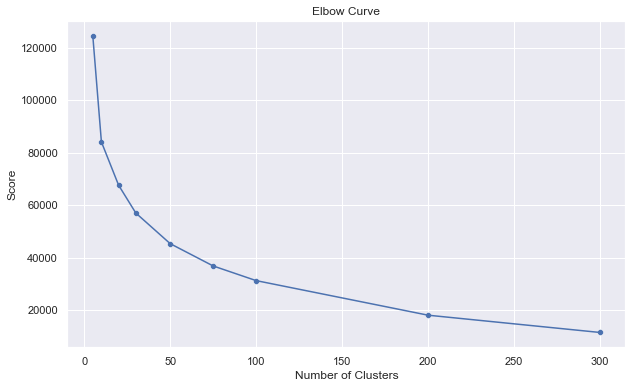

In [13]:
# gráfico de los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Al ver el gráfico se observa que hay bastante cambio en las pendientes de la curva por cada punto, pero aun asi no hay un punto en especifico que me haga querer decir que es donde se ve el mayor cambio, sin embargo si tuviera que decir un número seria el 50, aunque preferiría algun valor entre 50 y 100, pero quizas seria mejor colocar mas casos entre 50 y 300 de forma que se visualice mejor, en ese caso quizas cambiaria mi respuesta.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

In [15]:
#Abrimos el dataset
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
iris.mean(axis=0)

----------------------
Media de cada variable
----------------------


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
species         1.000000
dtype: float64

In [17]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
iris.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
species         0.671141
dtype: float64

# PCA

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca = PCA()
pca.fit(iris)

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.334025,-0.080346,0.800593,0.336579,0.357404
PC2,0.688526,0.684749,-0.097139,-0.068946,-0.207030
PC3,-0.441478,0.611414,-0.146679,0.420202,0.482893
PC4,-0.433128,0.303487,0.490804,0.066671,-0.689175
PC5,-0.178485,0.242346,0.295318,-0.837225,0.348214


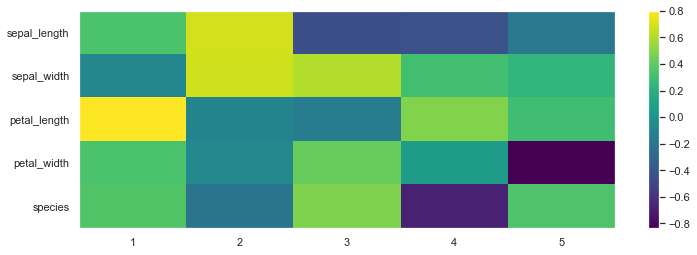

In [19]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

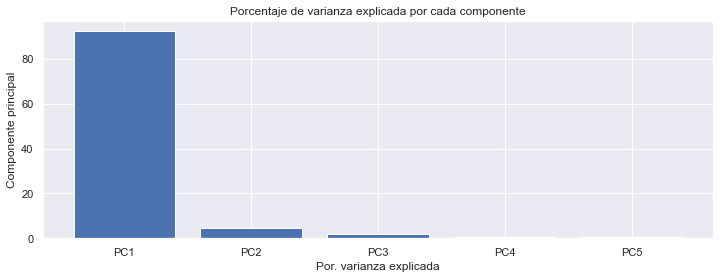

In [20]:
 # graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

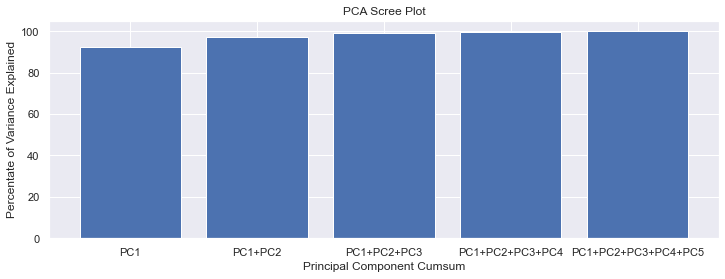

In [21]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

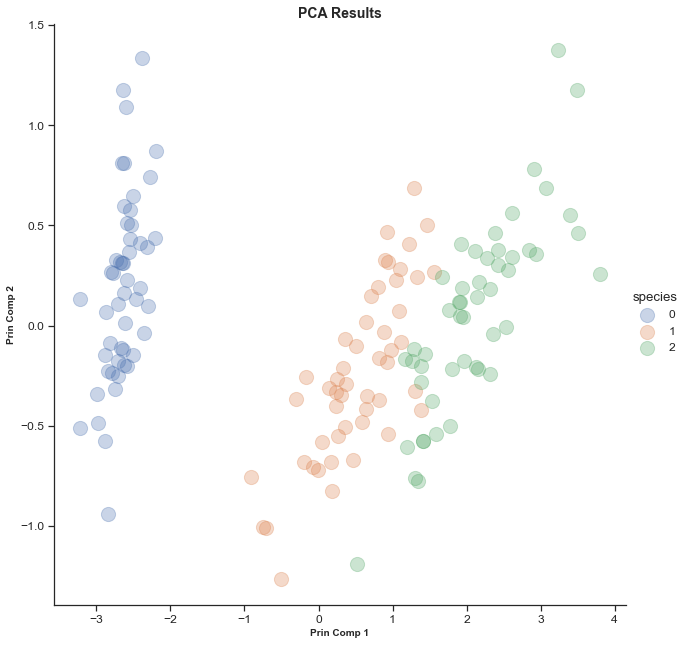

In [22]:
# PCA
X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
pca['species'] = y 

# Plot PCA
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear scatterplot del dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results' , weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

# TSNE

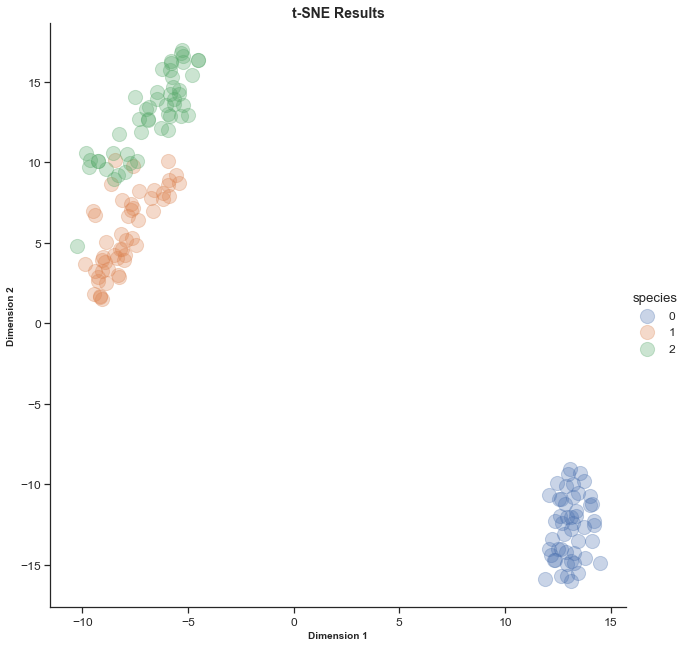

In [23]:
# tsne
X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
tsne = pd.DataFrame(X_transform,columns = ['DIM_1','DIM_2'])
tsne['species'] = y 

# Plot Digits t-SNE
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear scatterplot del dataframe
sns.lmplot(x='DIM_1',
           y='DIM_2',
           data=tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Se puede concluir que el t-SNE es un mejor algoritmo de clustering que PCA, pues se ve a simple vista, que a pesar de que 2 tiene un termino mas lejano del resto, tiene mucha menor dispersión.

PD: los codigos de problema 2 se sacaron directo de lo visto en clase por lo cual se mantuvieron los comentarios que realizo el profesor, y se entiende que no son necesarios más por esta misma razón.